In [1]:
#-*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib as plt
import pyecharts
from pyecharts import Geo
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['SimHei']
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

In [2]:
data=pd.read_csv('jobs.jobs_python.csv',error_bad_lines=False)

In [3]:
city=data.city.str.split(" ",expand = True)

In [4]:
data_clean=data.drop(['_id','pid'],axis=1)

In [5]:
data_clean['city']=city[0]
data_clean['city'].sample(20)

2775    深圳
2336    成都
1819    杭州
2580    广州
1370    武汉
580     上海
2866    深圳
1745    杭州
2542    广州
2721    深圳
1516    武汉
357     上海
2609    广州
2708    广州
1731    杭州
392     上海
1842    杭州
1127    青岛
1373    武汉
1221    郑州
Name: city, dtype: object

In [6]:
data_clean.loc[data['companySize'] == '0-20人', 'companySize'] = '微型企业'
data_clean.loc[data['companySize'] == '20-99人', 'companySize'] = '小型企业'
data_clean.loc[data['companySize'] == '100-499人', 'companySize'] = '中小型企业'
data_clean.loc[data['companySize'] == '500-999人', 'companySize'] = '中型企业'
data_clean.loc[data['companySize'] == '1000-9999人', 'companySize'] = '中大型企业'
data_clean.loc[data['companySize'] == '10000人以上', 'companySize'] = '大型企业'
data_clean.loc[data['companySize'].isna(), 'companySize'] = np.nan
data_clean.companySize.unique()

array(['中大型企业', '中小型企业', '大型企业', '微型企业', nan, '小型企业', '中型企业'],
      dtype=object)

In [7]:
data_clean['updated_at']=pd.to_datetime(data_clean['updated_at'])

In [8]:
data_df = pd.DataFrame(data_clean)
data_df.to_csv('clean_jobs_python.csv')
# data_df.to_excel(writer)
# writer.save()

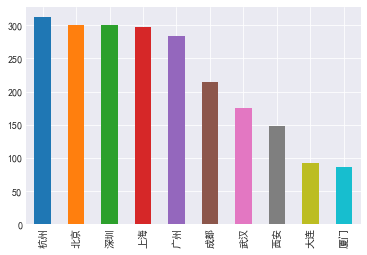

In [9]:
#数据分析
data_clean['city'].value_counts().nlargest(10).plot(kind="bar")#最前面解决了中文出现乱码的解决方法：https://github.com/mwaskom/seaborn/issues/1009

In [10]:
salary_city=data_clean.groupby('city')['salary.avg']

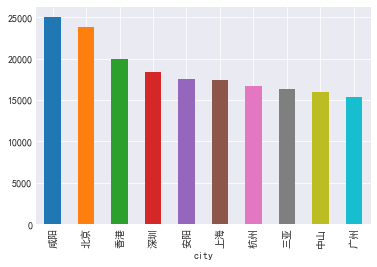

In [11]:
salary_city=data_clean.groupby('city')['salary.avg'].mean()#平均工资前十的城市
for i in range(len(salary_city)):
    salary_city[i] = int(salary_city[i])
# 求平均值的时候记得取zheng
salary_city.nlargest(10).plot(kind="bar")
# salary_city

In [12]:
city = data_clean['city'].value_counts()

In [13]:
bar = pyecharts.Bar('城市与职位数量')
bar.add('城市', city[:15].index, city[:15].values, mark_point=["max"])
bar

In [14]:
bar = pyecharts.Bar('城市与薪资高低')
salary_city=data_clean.groupby('city')['salary.avg'].mean().nlargest(15)
for i in range(len(salary_city)):
    salary_city[i] = int(salary_city[i])
bar.add('城市', salary_city[:15].index, salary_city[:15].values,xaxis_rotate=32,mark_point_symbolsize=70,yaxis_max =30000)
bar
# salary_city=data_clean.groupby('city')['salary.avg'].mean()#平均工资前十的城市
# # 求平均值的时候记得取zheng
# salary_city.nlargest(10).plot(kind="bar")

In [15]:
city_pct = (city/city.sum()).map(lambda x: '{:,.2%}'.format(x))[:20]

In [16]:
hz_company=data_clean.loc[data_clean['city'] == '杭州', 'companyShortName'].value_counts()[:10]

In [17]:
bar = pyecharts.Bar('杭州python岗位招聘前十的公司')
bar.add('杭州', hz_company.index,hz_company.values, mark_point=["max"], yaxis_max =20,xaxis_rotate=22)
bar

In [18]:
sz_company=data_clean.loc[data_clean['city'] == '深圳', 'companyShortName'].value_counts()[:10]

In [19]:
bar = pyecharts.Bar('深圳python岗位招聘前十的公司')
bar.add('深圳', sz_company.index,sz_company.values, mark_point=["max"],yaxis_max=10, xaxis_rotate=22)
bar

In [20]:
bj_company=data_clean.loc[data_clean['city'] == '北京', 'companyShortName'].value_counts()[:10]

In [21]:
bar = pyecharts.Bar('北京python岗位招聘前十的公司')
bar.add('北京', bj_company.index,bj_company.values, mark_point=["max"],yaxis_max=10, xaxis_rotate=22,is_label_show=True)
bar

In [22]:
def topN(dataframe, n=5):#20个城市中，招聘职位数量前五的公司是哪些
    counts = dataframe.value_counts()
    return counts[:n]

In [23]:
data_clean.groupby('city').companyShortName.apply(topN)

city             
三亚    鑫通游艇俱乐部         1
      三亚源丰            1
      本旺文化传媒有限公司      1
三明    国联政信            1
上海    傲梦网络科技          6
      上海数旦            4
      天玑科技            4
      耕子教育            4
      慧宏友科            4
东莞    云鲸智能            3
      软通动力            3
      易宝软件            2
      玩创星球            1
      速嵌              1
中山    艾里斯智能传媒         1
丽水    码猿教育            1
乌鲁木齐  山野星辰网络科技        1
      中公教育新疆分校        1
乐山    益强科技            1
九江    九江云中云网络科技       1
佛山    佰林格都            3
      嘉泰科技            2
      嘉西雅             2
      众图互联            1
      蔚岚电子            1
保定    六面体             1
      麦纸网             1
兰州    中公教育            2
      萃英大农            1
      爱彼利             1
                     ..
重庆    3158创业信息网       2
      一码天下（重庆）...     2
      码博科技            1
金华    5173            2
      今日头条            1
      浙江艺通科技          1
      义乌富源            1
      码猿教育            1
铜陵    程果教育            2
银川    宁夏睿馨商贸有限...     

In [24]:
data_clean.groupby('city').companyShortName.apply(topN).loc[list(city_pct[:20].index)]#apply()函数，间接的调用函数

city             
上海    傲梦网络科技          6
      上海数旦            4
      天玑科技            4
      耕子教育            4
      慧宏友科            4
北京    老虎集团            6
      百度              6
      今日头条            6
      客知音             4
      DNV音乐集团         4
厦门    厦门渊亭            4
      网宿科技            3
      神州优车集团          3
      趣店集团            3
      十全十美            3
合肥    恒天软件            3
      耐兮科技            2
      紫光云数            2
      科大讯飞            2
      傲梦网络科技          2
大连    纬创              9
      暗泉信息            4
      景云科技            3
      腾讯无线大连研发中心      3
      中控智慧            3
天津    华夏卓越            3
      天津融汇            3
      做票君             2
      妙计旅行            2
      万星在线            2
                     ..
苏州    苏州闻道            7
      思迹信息            4
      矩电新能源           3
      山石网科            3
      所以信息            2
西安    软通动力           28
      中软国际           14
      华为              9
      傲梦网络科技          7
      小马              

In [25]:
data_clean.groupby('city').companyShortName.apply(topN).loc["杭州"]

杭州默安科技有限公司    15
软通动力          10
小码教育           8
蚂蚁金服           7
沃趣科技           6
Name: companyShortName, dtype: int64

In [26]:
salary_by_city = data_clean.groupby('city')['salary.avg']
salary_by_city.nlargest(10)

city      
三亚    3111    30000
      3110    12000
      3108     7000
三明    2100     4500
上海    471     50000
      402     40000
      316     37500
      392     37500
      411     37500
      553     37500
      398     35000
      413     32500
      528     32500
      514     31000
东莞    3058    22500
      3065    22500
      3070    22500
      3071    20500
      3048    18000
      3067    17500
      3051    15000
      3064    15000
      3069    15000
      3059    14000
中山    3073    16000
丽水    1908     5000
乌鲁木齐  1155     9000
      1156     9000
乐山    2432     5500
九江    2125     5500
              ...  
长春    699      9000
      695      8000
      700      8000
      703      6500
      697      5000
      701      3500
      698      1500
长沙    2138    20000
      2175    20000
      2153    16000
      2159    16000
      2135    15000
      2143    15000
      2150    15000
      2158    15000
      2194    15000
      2192    14500
青岛    1089    19500
      114

In [27]:
salary_by_city = data_clean.groupby('city')['salary.avg'].mean()#薪资在前十的城市
for i in range(len(salary_by_city)):
    salary_by_city[i] = int(salary_by_city[i])
salary_by_city_top = salary_by_city.nlargest(11)[1:]
salary_by_city_top

city
北京    23848.0
香港    20000.0
深圳    18336.0
安阳    17500.0
上海    17437.0
杭州    16703.0
三亚    16333.0
中山    16000.0
广州    15335.0
湖州    15000.0
Name: salary.avg, dtype: float64

In [28]:
line = pyecharts.Line('python岗位薪资前十的城市')
line.add('薪资', salary_by_city_top.index,salary_by_city_top.values, mark_point=["max"],mark_point_symbol='pin',mark_point_symbolsize =70,label_text_size=11,is_random=True,yaxis_max=30000)
line

In [29]:
top10_city = salary_by_city[city_pct.index[:10]].sort_values(ascending=False)

In [30]:
bar = pyecharts.Bar('北上广深杭等热门城市平均工资')
bar.add('薪资',top10_city.index,top10_city.values,label_text_size=11,mark_point_symbolsize=70,mark_point=["max","min"],is_random=True)
bar

In [51]:
bar = pyecharts.Bar('北上广深杭等城市平均工资')
bar.add('', top10_city.index, np.round(top10_city.values, 0),mark_point=["max","min"],mark_point_symbolsize=70,is_random=True)
bar

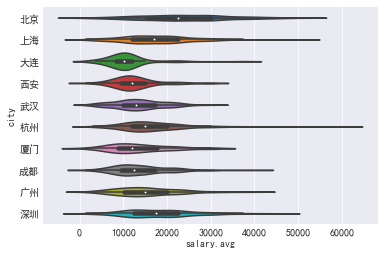

In [32]:
top10_city_box = data_clean.loc[data_clean['city'].isin(top10_city.index),:]
sns.violinplot(x ='salary.avg', y ='city', data = top10_city_box)

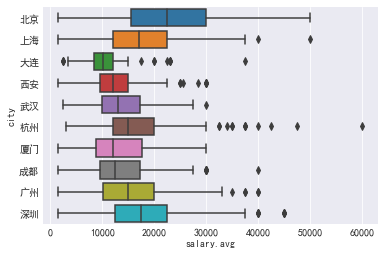

In [33]:
sns.boxplot(x ='salary.avg', y ='city', data = top10_city_box) 

In [34]:
job_academic = data_clean['education'].value_counts()#学历要求
job_academic

本科       2263
大专        529
学历不限      246
硕士         63
博士          5
高中          4
中专/中技       2
Name: education, dtype: int64

In [35]:
pie = pyecharts.Pie("学历要求")
pie.add('', job_academic.index, job_academic.values,is_label_show=True,center=[50,60])
pie

In [36]:
E_education=data_clean.groupby(['education'])['salary.avg'].mean().sort_values()
for i in range(len(E_education)):
    E_education[i] = int(E_education[i])
E_education

education
高中        9125.0
中专/中技     9750.0
大专       11402.0
学历不限     11558.0
本科       15658.0
硕士       19984.0
博士       28500.0
Name: salary.avg, dtype: float64

In [37]:
bar = pyecharts.Bar('不同学历平均工资')
bar.add('薪资',E_education.index,E_education.values,label_text_size=11,is_random=True,mark_point=["max","min"],mark_point_symbolsize =70)
bar

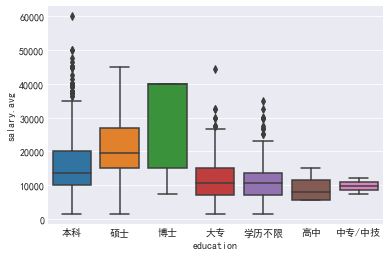

In [38]:
sns.boxplot(x="education", y="salary.avg", data=data_clean)
# boxplot = pyecharts.Boxplot("箱形图")
# x_axis = data_clean['education'].unique()
# y_axis = data_clean['education'].value_counts().values
# _yaxis = boxplot.prepare_data(y_axis)     # 转换数据
# boxplot.add("boxplot", x_axis, _yaxis)
# boxplot.render()
# boxplot

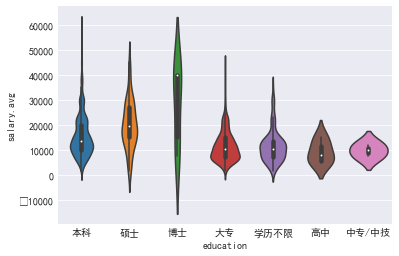

In [39]:
sns.violinplot(x="education", y="salary.avg", data=data_clean)

In [40]:
industry= data_clean['industryField'].value_counts()

In [41]:
bar = pyecharts.Bar('行业与职位数量')
bar.add('', industry.index, industry.values, 
        mark_point=["max","min","average"], xaxis_rotate=45)
bar

In [42]:
industry_top15= data_clean['industryField'].value_counts()[:15]

In [43]:
bar = pyecharts.Bar('行业与职位数量')#最渴望python人才的行业
bar.add('', industry_top15.index, industry_top15.values, 
        mark_point=["max","min","average"], xaxis_rotate=45)
bar

In [44]:
C_company=data_clean.groupby('companyShortName')['salary.avg'].agg(['count', 'mean']).sort_values(by='count', ascending = False)[:15]
C_company_count=C_company['count']
C_company_mean=C_company['mean']
for i in range(len(C_company_mean)):
    C_company_mean[i] = int(C_company_mean[i])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [45]:
bar = pyecharts.Bar('全国对python岗位最渴望的前15家公司')
bar.add('招聘数量',C_company_count.index,C_company_count.values,label_text_size=11,is_random=True,mark_point=["max","min"],xaxis_rotate=45)
bar

In [52]:
bar = pyecharts.Bar('全国python岗位需求最高公司的薪资统计')
bar.add('薪资',C_company_mean.index,C_company_mean.values,label_text_size=11,is_random=True, mark_point_symbolsize=70,mark_point=["max","min"],xaxis_rotate=30,)
bar

In [47]:
data_clean['companySize'].value_counts()

小型企业     846
中小型企业    685
大型企业     386
微型企业     351
中大型企业    302
中型企业     226
Name: companySize, dtype: int64

In [48]:
company_size_salary = data_clean.groupby('companySize')['salary.avg'].mean()
for i in range(len(company_size_salary)):
    company_size_salary[i] = int(company_size_salary[i])
company_size_salary

companySize
中型企业     14869.0
中大型企业    17003.0
中小型企业    16199.0
大型企业     18457.0
小型企业     13346.0
微型企业     11756.0
Name: salary.avg, dtype: float64

In [49]:
job_offer = data_clean['city'].dropna().value_counts()
data=list(job_offer.items())[:50]

In [50]:
geo =Geo("全国主要城市python岗位数目", "job offer  for python", title_color="#fff", title_pos="center", width=1200, height=600, background_color='#404a59')
attr, value =geo.cast(data)
geo.add("", attr, value, visual_text_color="#fff",
    symbol_size=13,
    is_visualmap=True)
geo.show_config()
geo.render("./地图系列.html")


{
    "title": [
        {
            "text": "\u5168\u56fd\u4e3b\u8981\u57ce\u5e02python\u5c97\u4f4d\u6570\u76ee",
            "subtext": "job offer  for python",
            "left": "center",
            "top": "auto",
            "textStyle": {
                "color": "#fff",
                "fontSize": 18
            },
            "subtextStyle": {
                "fontSize": 12
            }
        }
    ],
    "toolbox": {
        "show": true,
        "orient": "vertical",
        "left": "95%",
        "top": "center",
        "feature": {
            "saveAsImage": {
                "show": true,
                "title": "save as image"
            },
            "restore": {
                "show": true,
                "title": "restore"
            },
            "dataView": {
                "show": true,
                "title": "data view"
            }
        }
    },
    "series_id": 6767934,
    "tooltip": {
        "trigger": "item",
        "triggerOn": "mouse